----
# Wprowadzenie - część 1
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

## 0. Zagadnienia do opanowania przed zajęciami
### 0.1. Zapoznanie z podstawami językiem programowania *Python*
https://www.w3schools.com/python/python_intro.asp  
### 0.2. Zapoznanie z postawami biblioteki *numpy*
https://www.w3schools.com/python/numpy_intro.asp  
https://numpy.org/devdocs/user/quickstart.html  
### 0.3. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.4. Przydatne informacje:
Funkcje z biblioteki *numpy* potrzebne do zrealizowania ćwiczenia:  
`numpy.linspace, numpy.sin, numpy.min, numpy.max, numpy.random.uniform, numpy.random.normal, numpy.poly1d, numpy.polymul, numpy.polyder, numpy.polyval`  
Dokumentacja i opisy poszczególnych funkcji *numpy*:  
https://numpy.org/doc/stable/reference/    

Funkcje z biblioteki *matplotlib* potrzebne do zrealizowania ćwiczenia:  
`matplotlib.pyplot.figure, matplotlib.pyplot.plot, matplotlib.pyplot.xlabel, matplotlib.pyplot.ylabel, matplotlib.pyplot.grid, atplotlib.pyplot.axis, matplotlib.pyplot.subplot`  
Dokumentacja i opisy poszczególnych funkcji *matplotlib*:  
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot




In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy 
default_figsize=(14, 8)

----
## 1. Rysowanie wykresów
----
### Zadanie: Narysuj wykres jednego okresu funkcji $f(\omega) = sin(\omega + \frac{\pi}{4})$
* zmień kolor wykresu
* dodaj opisy osi i tytuł wykresu
* zastosuj 10% marginesy

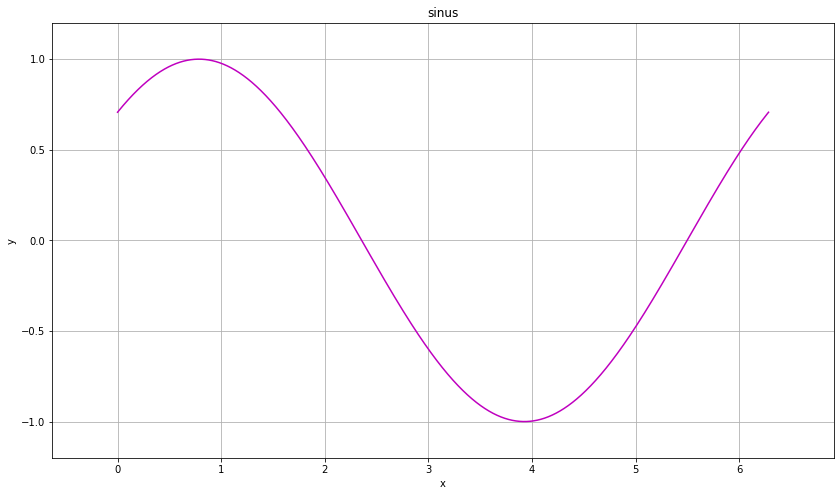

In [9]:
def introduction_plot_sinus():

    #narysuj wykres    
    x = np.linspace(0, 2*np.pi, 2000) #przedzial w ktorym rysujemy
    y = np.sin(x+np.pi/4) #wzor sinusa
    fig = plt.figure(figsize = default_figsize)
    plt.plot(x, y, "m")

    #dodaj opisy osi i tytuł wykresu
    plt.title("sinus")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
        
    #zastosować 10% marginesy
    x_min = np.min(x)
    x_max = np.max(x)
    x_range = x_max - x_min
    x_margin = x_range / 10

    y_min = np.min(y)
    y_max = np.max(y)
    y_range = y_max - y_min
    y_margin = y_range / 10


    plt.axis([x_min - x_margin, x_max + x_margin, y_min - y_margin, y_max + y_margin])



    return
    
introduction_plot_sinus()

----
## 2. Podział okna wykresu
----
### Zadanie: Używając „subplot” narysuj wykres 3 funkcji w następujący sposób:
(dla x w zakresie $<-0,2\pi>$)
<table>
  <tr>
    <td colspan="2" bgcolor="blue" width="200" height="100" style="color: white; text-align:center">sin(x)</td>
  </tr>
  <tr>
    <td bgcolor="red" width="100" height="100" style="color: white; text-align:center">cos(x)</td>
    <td bgcolor="green" width="100" height="100" style="color: white; text-align:center">arctan(x)</td>
  </tr>
</table>

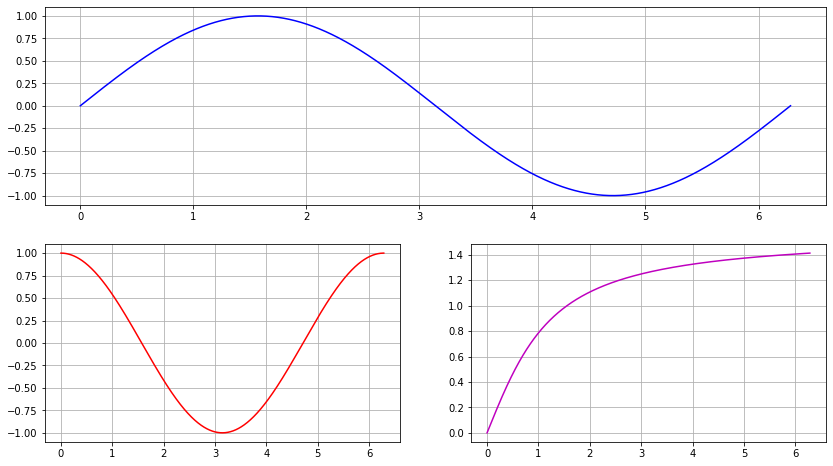

In [10]:
def introduction_plot_subplot():
    #narysuj wykres

    x = np.linspace(0, 2*np.pi, 2000)
    y = np.sin(x)
    z = np.cos(x)
    w = np.arctan(x)


    fig = plt.figure(figsize = default_figsize)

    #sinus
    plt.subplot(2,1,1)
    plt.plot(x, y, "b")
    plt.grid()

    #cosinus
    plt.subplot(2,2,3)
    plt.plot(x, z , "r")
    plt.grid()

    #arctg

    plt.subplot(2,2,4)
    plt.plot(x, w, "m")
    plt.grid()
    





    return
    
introduction_plot_subplot()

---- 
## 3. Operacje na wielomianach
---- 
### Dla zdefiniowanych wielomianów:  
$ a(x) = x^4 + x^3 - x^2 - 1 $  
$ b(x) = x^3 - x + 1 $  
$ c(x) = x^5 - x^4 + x^3 - 1 $  
### Wylicz:  
$ d(x) = a(x) \cdot c(x)$  
$ e(x) = \frac{\partial d(x)}{\partial x}$  
$ f(x) = e(x) + b(x) - x^{3}$  
### Narysuj wykres wielomianu $f(x)$ dla $x\in<-1,1>$


a=[ 1  1 -1  0 -1]
b=[ 1  0 -1  1]
c=[ 1 -1  1  0  0 -1]
d=[ 1  0 -1  2 -2  0 -2  1  0  1]
e=[  9   0  -7  12 -10   0  -6   2   0]
f=[  9   0  -7  12 -10   0  -6   1   1]


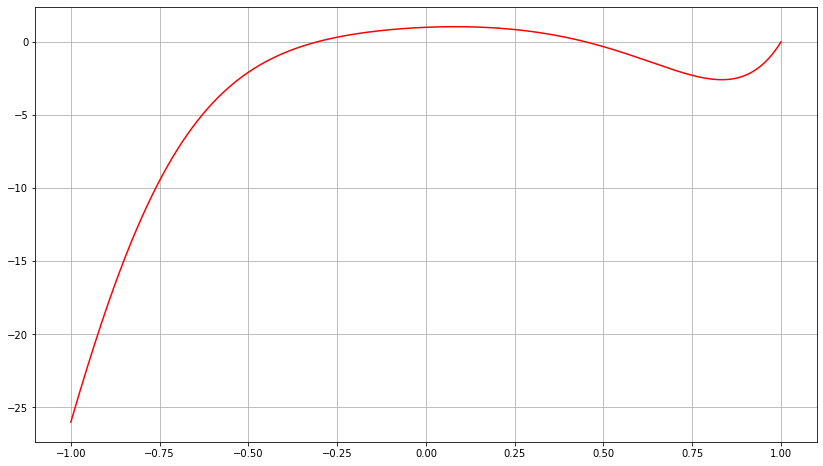

In [11]:
def introduction_plot_polynomial():
    #wykonaj operacje na wielomianach

    a = np.poly1d([1, 1, -1, 0, -1])
    b = np.poly1d([1, 0, -1, 1])
    c = np.poly1d([1, -1, 1, 0, 0, -1])
    
    d = np.polymul(a,c)
    e = np.polyder(d)
    f = e + b - np.poly1d([1,0,0,0])

    #wyświetl wielomiany

    print("a=" + str(a.coeffs))
    print("b=" + str(b.coeffs))
    print("c=" + str(c.coeffs))
    print("d=" + str(d.coeffs))
    print("e=" + str(e.coeffs))
    print("f=" + str(f.coeffs))



    #narysuj wykres

    x = np.linspace(-1, 1, 2000)
    y = np.polyval(f, x)
    fig = plt.figure(figsize = default_figsize)
    plt.plot(x, y, "r")
    plt.grid()
    




    return

introduction_plot_polynomial()

---- 
## 4. Sympy - moduł obliczeń symbolicznych
---- 
Funkcje z biblioteki sympy potrzebne do zrealizowania ćwiczenia:  
* deklaracja zmienej symbolicznej `t = sympy.Symbol('t')`, opcjonalnie z dodatkowymi atrybutami np. `t = sympy.Symbol('t', real=True)`.  
* wyznaczanie całki nieoznaczonej  $\int x^2 dx$ `sympy.integrate(x**2, x)`  
* wyznaczanie całki oznaczonej $\int_{a}^{b} x^2 dx$ `sympy.integrate(x**2, (x, a, b))`  
* wyświetlanie sformatowanego wyniku `display(  )`  
  
Wyznacz $\int t^2 dt$ oraz $\int_{-1}^{1} t^2 dt$ i wyświetl wyniki.

In [12]:
def introduction_symbolic():


    #zadeklaruj zmienną t
    t = sympy.Symbol('t')


    #wyznacz i wyświetl całkę nieoznaczoną
    display(sympy.integrate(t**2,t))
    



    #wyznacz i wyświetl całkę oznaczoną
    display(sympy.integrate(t**2, (t, -1, 1)))

    return

introduction_symbolic()

t**3/3

2/3

----
## 5. Rozkłady statystyczne (zadanie dodatkowe)
----
### Zadanie: Wygeneruj wektor 100 000 elementów i wykreśl histogram składający się z 50 przedziałów
* wartości o rozkładzie równomiernym <-1; 1> 
* wartości o rozkładzie normalnym µ=0, σ=0.5

In [13]:
def introduction_plot_histogram():



    #wygeneruj wektory elementów




    #narysuj histogramy
    return    
    
introduction_plot_histogram()

---- 
## 6. THE END
---- 